##### AT - Inteligência Artificial: Model LifeCycle

##### Questão 1. Estruturação conceitual do problema de modelagem

In [1]:
# (a) - Compreensão do problema e reconhecimento do papel do aprendizado supervisionado neste cenário

Neste trabalho, o objetivo é prever o risco de uma pessoa desenvolver diabetes com base em variáveis clínicas e comportamentais. Para isso, contamos com um conjunto de dados rotulado, em que cada instância está associada a um valor binário (Diabetes_binary), indicando a presença (1) ou ausência (0) da condição.

Isso caracteriza uma tarefa de aprendizado supervisionado, pois estamos lidando com um conjunto de treinamento com rótulos conhecidos. O modelo aprende padrões a partir desses exemplos rotulados, com a finalidade de generalizar e prever o rótulo (risco de diabetes) em novos casos.

In [2]:
# (b) - Justifique tecnicamente por que o problema em questão deve ser tratado como uma tarefa de classificação supervisionada.

A variável-alvo (Diabetes_binary) é binária, o que implica que estamos lidando com duas classes distintas: presença ou ausência de diabetes. Além disso, todas as variáveis explicativas (como idade, IMC, nível de atividade física, histórico de saúde etc.) são fornecidas como entrada para tentar prever esse resultado.

Logo, o problema naturalmente se encaixa na categoria de classificação supervisionada binária, pois:
- Temos rótulos conhecidos no conjunto de treino;
- A saída esperada é uma classe categórica (0 ou 1);
- O foco é atribuir corretamente a classe a novas amostras com base nas variáveis preditoras.

In [3]:
# (c) - Identifique e discuta ao menos dois desafios relevantes para a aplicação de modelos de aprendizado supervisionado neste conjunto de dados.

1. Desequilíbrio entre classes
- A quantidade de exemplos da classe "sem diabetes" (0) é significativamente maior que a da classe "com diabetes" (1). Isso pode levar os modelos a aprenderem padrões enviesados, privilegiando a classe majoritária e prejudicando a detecção de casos positivos.

2. Normalização de dados
- O dataset apresenta variáveis com escalas diferentes (por exemplo, idade e IMC vs. variáveis binárias). Alguns algoritmos, como KNN e regressão logística, são sensíveis à escala dos dados. Por isso, a normalização ou padronização se torna necessária para evitar que variáveis com maior magnitude dominem o processo de aprendizado.

In [4]:
# (d) - Liste e explique o uso das principais bibliotecas utilizadas no desenvolvimento do seu pipeline.

1. Pandas: utilizada para leitura, limpeza e manipulação do conjunto de dados. É a base para preparar o dataset antes da modelagem.

2. NumPy: auxilia em operações matemáticas vetorizadas e manipulação de arrays, além de ser utilizada internamente por outras bibliotecas.

3. Scikit-Learn (sklearn): biblioteca principal para a construção dos modelos de machine learning, incluindo algoritmos como KNN e regressão logística, bem como ferramentas para normalização (StandardScaler), avaliação (classification_report, roc_auc_score) e otimização (GridSearchCV).

4. Matplotlib / Seaborn: utilizadas para visualização dos dados e resultados, como gráficos de barras, curvas ROC, ou distribuição de variáveis. Isso ajuda na análise exploratória e na comunicação dos resultados.

##### Questão 2. Implementação do modelo com K-Nearest Neighbors

In [5]:
# (a) - Carregamento dos dados e definição das variáveis

In [6]:
import pandas as pd

df = pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")

# Variável-alvo: Diabetes_binary (0 = não tem diabetes, 1 = tem diabetes)
# Seleção de variáveis explicativas: todas as demais colunas, removendo a alvo
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]

Neste passo, carregamos a base de dados e selecionamos a variável alvo Diabetes_binary, que representa se o indivíduo possui (1) ou não (0) diagnóstico de diabetes. Todas as demais variáveis foram consideradas como preditoras, pois representam indicadores de saúde e estilo de vida relevantes.

In [7]:
# (b) - Separação dos dados em treino e teste

In [8]:
from sklearn.model_selection import train_test_split

# Separando dados com estratificação para preservar a proporção de classes
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

Para avaliar o modelo de forma justa, dividimos os dados em treino e teste utilizando estratificação, o que garante a preservação da proporção de classes nas duas amostras. Isso é fundamental em contextos de classificação binária.

In [9]:
# (c) - Normalização das variáveis numéricas

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

O KNN é sensível à escala das variáveis, pois baseia-se em distâncias para fazer classificações. Por isso, aplicamos normalização via StandardScaler, padronizando as variáveis numéricas para média 0 e desvio padrão 1.

In [11]:
# (d) - Treinamento do modelo e análise do parâmetro K

Inicialmente, treinamos o modelo com K=5, valor comumente adotado como referência. Avaliamos seu desempenho por meio do relatório de classificação.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

# Treinamento inicial com K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

print("Relatório de classificação (K = 5):")
print(classification_report(y_test, y_pred))

Relatório de classificação (K = 5):
              precision    recall  f1-score   support

         0.0       0.72      0.69      0.70     10604
         1.0       0.70      0.74      0.72     10604

    accuracy                           0.71     21208
   macro avg       0.71      0.71      0.71     21208
weighted avg       0.71      0.71      0.71     21208



Em seguida, testamos vários valores de K (de 1 a 20), utilizando validação cruzada (5-fold) e F1-score como métrica principal. Isso permite verificar o impacto do valor de K na performance geral do modelo.

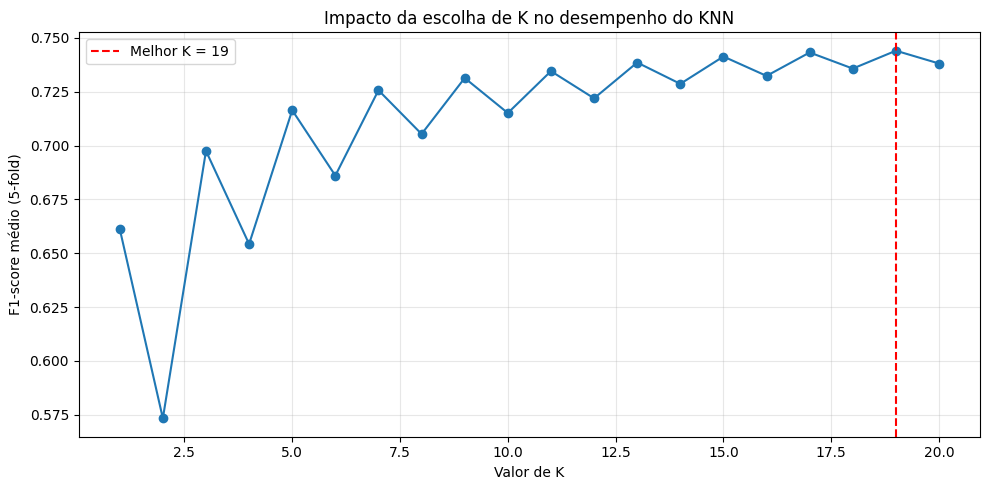

Melhor valor de K: 19
F1-score médio correspondente: 0.7441


In [13]:
# Avaliação do impacto da escolha do parâmetro K (1 a 20)
k_values = list(range(1, 21))
f1_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')
    f1_scores.append(np.mean(scores))

best_k = k_values[np.argmax(f1_scores)]
best_score = max(f1_scores)

# Gráfico
plt.figure(figsize=(10,5))
plt.plot(k_values, f1_scores, marker='o')
plt.axvline(x=best_k, color='red', linestyle='--', label=f'Melhor K = {best_k}')
plt.xlabel("Valor de K")
plt.ylabel("F1-score médio (5-fold)")
plt.title("Impacto da escolha de K no desempenho do KNN")
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()

print(f"Melhor valor de K: {best_k}")
print(f"F1-score médio correspondente: {best_score:.4f}")

O melhor desempenho foi obtido com K = 19, alcançando um F1-score médio de 0.7441, conforme evidenciado no gráfico acima. Isso indica que valores mais altos de K suavizaram a decisão do classificador, reduzindo a sensibilidade a ruídos e melhorando a generalização.

Valores baixos de K tendem a causar overfitting, enquanto valores muito altos podem levar a underfitting. O valor ótimo encontrado representou o melhor equilíbrio entre esses dois extremos.

##### Questão 3. Validação cruzada e comparação entre modelos

In [14]:
# (a) - Aplicação de validação cruzada ao modelo KNN

Aplicamos a validação cruzada com 5 dobras (5-fold) no modelo KNN com o melhor valor de K identificado na etapa anterior. A métrica utilizada foi o F1-score, pois ela é mais robusta em contextos de desbalanceamento entre as classes (como é o caso desta base).

In [15]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

knn = KNeighborsClassifier(n_neighbors=best_k)

knn_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='f1')
knn_f1_mean = np.mean(knn_scores)
print("F1-score médio (KNN):", round(knn_f1_mean, 4))

F1-score médio (KNN): 0.7441


A validação cruzada, especialmente a do tipo k-fold (com 5 dobras neste caso), contribui para uma estimativa mais realista e robusta do desempenho do modelo. Isso ocorre porque o modelo é treinado e avaliado múltiplas vezes com diferentes subconjuntos dos dados, o que reduz o viés da divisão treino-teste única e melhora a generalização.

Em contextos com dados desbalanceadosm, tal qual nessa base de triagem de diabetes, ela é ainda mais valiosa, pois ajuda a garantir que a métrica de avaliação (como o F1-score) reflita o desempenho médio esperado do modelo ao ser aplicado a novos dados.

In [16]:
# (b) - Implementação de um segundo modelo com o mesmo processo

Selecionamos dois modelos adicionais para comparação:
- Regressão Logística, conhecida por sua simplicidade e boa capacidade de generalização;
- Árvore de Decisão, que tende a ter menor viés, porém maior risco de overfitting.

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Regressão Logística
log_model = LogisticRegression(max_iter=1000)
log_scores = cross_val_score(log_model, X_train_scaled, y_train, cv=5, scoring='f1')
log_f1_mean = np.mean(log_scores)

# Árvore de Decisão
tree_model = DecisionTreeClassifier(random_state=42)
tree_scores = cross_val_score(tree_model, X_train_scaled, y_train, cv=5, scoring='f1')
tree_f1_mean = np.mean(tree_scores)

print("F1-score médio (Regressão Logística):", round(log_f1_mean, 4))
print("F1-score médio (Árvore de Decisão):", round(tree_f1_mean, 4))

F1-score médio (Regressão Logística): 0.7523
F1-score médio (Árvore de Decisão): 0.6512


In [18]:
# (c) - Comparação dos modelos com base na validação cruzada

A tabela a seguir resume os F1-scores médios obtidos na validação cruzada com 5 dobras:

In [19]:
import pandas as pd

tabela_resultados = pd.DataFrame({
    'Modelo': ['Regressão Logística', 'K-Nearest Neighbors', 'Árvore de Decisão'],
    'F1-score médio': [log_f1_mean, knn_f1_mean, tree_f1_mean]
})

display(tabela_resultados)

,Modelo,F1-score médio
0,Regressão Logística,0.752336
1,K-Nearest Neighbors,0.744052
2,Árvore de Decisão,0.651156


A partir desses resultados, observamos que a Regressão Logística apresentou o melhor desempenho médio em termos de F1-score, seguida de perto pelo modelo KNN. A Árvore de Decisão teve o pior desempenho, o que pode estar relacionado a maior variação entre as predições e uma tendência ao overfitting em problemas com muitos atributos e dados ruidosos.

In [20]:
# (d) - Discussão sobre overfitting e underfitting

Com base na validação cruzada, é possível observar padrões importantes sobre viés e variância entre os modelos testados:

1. Regressão Logística obteve o desempenho mais estável. Trata-se de um modelo com alto viés e baixa variância, o que geralmente resulta em boa generalização, como demonstrado pelo seu maior F1-score médio. Isso sugere baixo risco de overfitting e um equilíbrio entre simplicidade e desempenho.

2. KNN apresentou desempenho semelhante ao da regressão, porém com ligeira queda no F1-score. Isso é esperado em modelos de menor viés e maior variância, principalmente quando o valor de K é alto

3. Árvore de Decisão, por outro lado, teve desempenho significativamente inferior, o que pode indicar overfitting. Esse tipo de modelo tende a memorizar os dados de treino, especialmente se não for podado ou regularizado, o que compromete sua capacidade de generalização.
Logo, a REgressão Logística se destaca como a abordagem mais robusta neste cenário, sendo a mais indicada para generalização a novos dados.

##### Questão 4. Avaliação final e otimização do desempenho preditivo

In [21]:
# (a) - Cálculo das métricas de avaliação: precisão, recall, F1-score e AUC

In [22]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
log_model.fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_test_scaled)
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]

report = classification_report(y_test, y_pred, output_dict=True)
auc = roc_auc_score(y_test, y_prob)

import pandas as pd
metrics_df = pd.DataFrame(report).transpose()
metrics_df = metrics_df.loc[['0.0', '1.0', 'accuracy', 'macro avg', 'weighted avg']]
metrics_df['AUC'] = auc

from IPython.display import display
display(metrics_df)

,precision,recall,f1-score,support,AUC
0.0,0.760427,0.725575,0.742592,10604.000000,0.823956
1.0,0.737601,0.771407,0.754126,10604.000000,0.823956
accuracy,0.748491,0.748491,0.748491,0.748491,0.823956
macro avg,0.749014,0.748491,0.748359,21208.000000,0.823956
weighted avg,0.749014,0.748491,0.748359,21208.000000,0.823956


Explicação:
- **Precisão (Precision)**: Mede a proporção de positivos previstos que são realmente positivos. Alta precisão significa que há poucos falsos positivos, algo importante em contextos onde o custo de um alarme falso é alto.
- **Revocação (Recall)**: Mede a proporção de positivos reais que foram corretamente identificados. Alta revocação é desejável em triagens de saúde, pois minimiza falsos negativos (pacientes doentes que não são identificados).
- **F1-score**: Média harmônica entre precisão e recall. Útil em cenários desbalanceados, como é o caso desta base.
- **AUC (Área sob a curva ROC)**: Mede a capacidade do modelo em distinguir entre as classes. Quanto mais próximo de 1, melhor o desempenho geral em classificar corretamente positivos e negativos.

In [23]:
# (b) - Matriz de confusão e interpretação dos erros

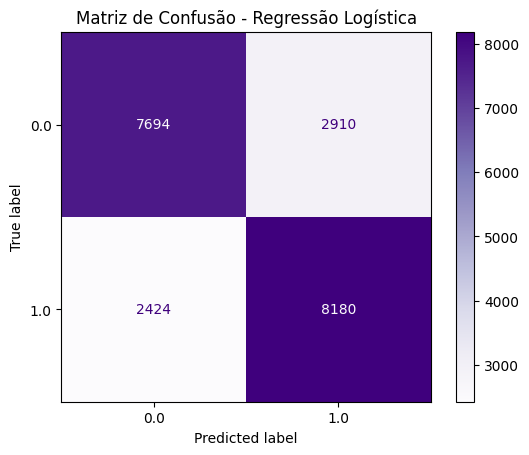

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_model.classes_)
disp.plot(cmap='Purples', values_format='d')
plt.title("Matriz de Confusão - Regressão Logística")
plt.grid(False)
plt.show()

A matriz de confusão permite identificar os acertos e erros do modelo. Nela, os falsos negativos (doentes classificados como saudáveis) são especialmente preocupantes no contexto de triagem em saúde pública, pois podem deixar pacientes sem o tratamento necessário. Falsos positivos também geram impacto, como exames ou intervenções desnecessárias.

In [25]:
# (c) - Busca por hiperparâmetros

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'penalty': ['l2'],
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'max_iter': [1000]
}

grid = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid.fit(X_train_scaled, y_train)

best_params = grid.best_params_
best_score = grid.best_score_

print("Melhor configuração encontrada:", best_params)
print(f"Melhor F1-score na validação cruzada: {best_score:.4f}")

Melhor configuração encontrada: {'C': 1, 'max_iter': 1000, 'penalty': 'l2', 'solver': 'lbfgs'}
Melhor F1-score na validação cruzada: 0.7523


A busca por hiperparâmetros visa encontrar a configuração mais adequada para maximizar o desempenho do modelo. Aqui, utilizamos o GridSearchCV com validação cruzada e F1-score como métrica de avaliação, garantindo robustez na escolha final.

In [27]:
# (d) - Comparação do desempenho antes e depois da otimização

In [28]:
best_model = grid.best_estimator_
y_pred_opt = best_model.predict(X_test_scaled)
y_prob_opt = best_model.predict_proba(X_test_scaled)[:, 1]

report_opt = classification_report(y_test, y_pred_opt, output_dict=True)
auc_opt = roc_auc_score(y_test, y_prob_opt)

# Comparação em DataFrame
opt_df = pd.DataFrame(report_opt).transpose()
opt_df = opt_df.loc[['0.0', '1.0', 'accuracy', 'macro avg', 'weighted avg']]
opt_df['AUC'] = auc_opt

base_df = metrics_df[['precision', 'recall', 'f1-score', 'AUC']].rename(columns={
    'precision': 'Precisão (Base)',
    'recall': 'Revocação (Base)',
    'f1-score': 'F1-score (Base)',
    'AUC': 'AUC (Base)'
})

opt_df = opt_df[['precision', 'recall', 'f1-score', 'AUC']].rename(columns={
    'precision': 'Precisão (Otimizado)',
    'recall': 'Revocação (Otimizado)',
    'f1-score': 'F1-score (Otimizado)',
    'AUC': 'AUC (Otimizado)'
})

comparison = pd.concat([base_df, opt_df], axis=1)
display(comparison)

,Precisão (Base),Revocação (Base),F1-score (Base),AUC (Base),Precisão (Otimizado),Revocação (Otimizado),F1-score (Otimizado),AUC (Otimizado)
0.0,0.760427,0.725575,0.742592,0.823956,0.760427,0.725575,0.742592,0.823956
1.0,0.737601,0.771407,0.754126,0.823956,0.737601,0.771407,0.754126,0.823956
accuracy,0.748491,0.748491,0.748491,0.823956,0.748491,0.748491,0.748491,0.823956
macro avg,0.749014,0.748491,0.748359,0.823956,0.749014,0.748491,0.748359,0.823956
weighted avg,0.749014,0.748491,0.748359,0.823956,0.749014,0.748491,0.748359,0.823956


Os resultados do modelo otimizado coincidem com os obtidos anteriormente, pois a configuração original da Regressão Logística (C=1, penalty='l2', solver='lbfgs') já correspondia à melhor combinação identificada pelo GridSearchCV. Isso reforça a robustez e a boa escolha inicial do modelo.